In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [ ]:
# Reading Data
df = pd.read_csv("https://query.data.world/s/ftu7dhqal6vx24ftodz6we7jhlboew?dws=00000")

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
# Converting Crop_Year to object type as it denotes categorical year value not numerical continuous value
df['Crop_Year'] = df['Crop_Year'].astype('object')

In [ ]:
# Number of missing values for each column
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
# Shape of data
df.shape

(246091, 7)

In [ ]:
# Number of rows with NA values is very small compared to total rows, hence dropping them
df = df.dropna()

In [ ]:
# Unique Years in the dataset
df['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=object)

In [ ]:
# Data Points for each year
df['Crop_Year'].value_counts()

2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64

Number of data points for year 2015 is very less hance conclusions from EDA for year 2015 may not be accurate.

<Axes: title={'center': 'Total Production by Year'}, xlabel='Crop_Year', ylabel='Production'>

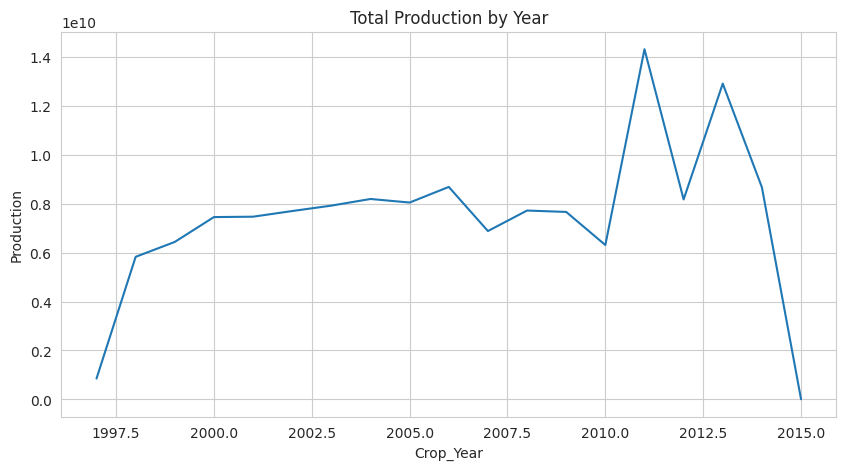

In [ ]:
# Total production trend over the years
_ = plt.figure(figsize=(10,5))
plt.title("Total Production by Year")
d = df.groupby('Crop_Year')['Production'].sum().reset_index()
sns.lineplot(x='Crop_Year', y='Production', data=d)

There has been an increase in total production after 2010 from being consistant till 2010. (we can ignore data for 2015 as the number of data points are very less)

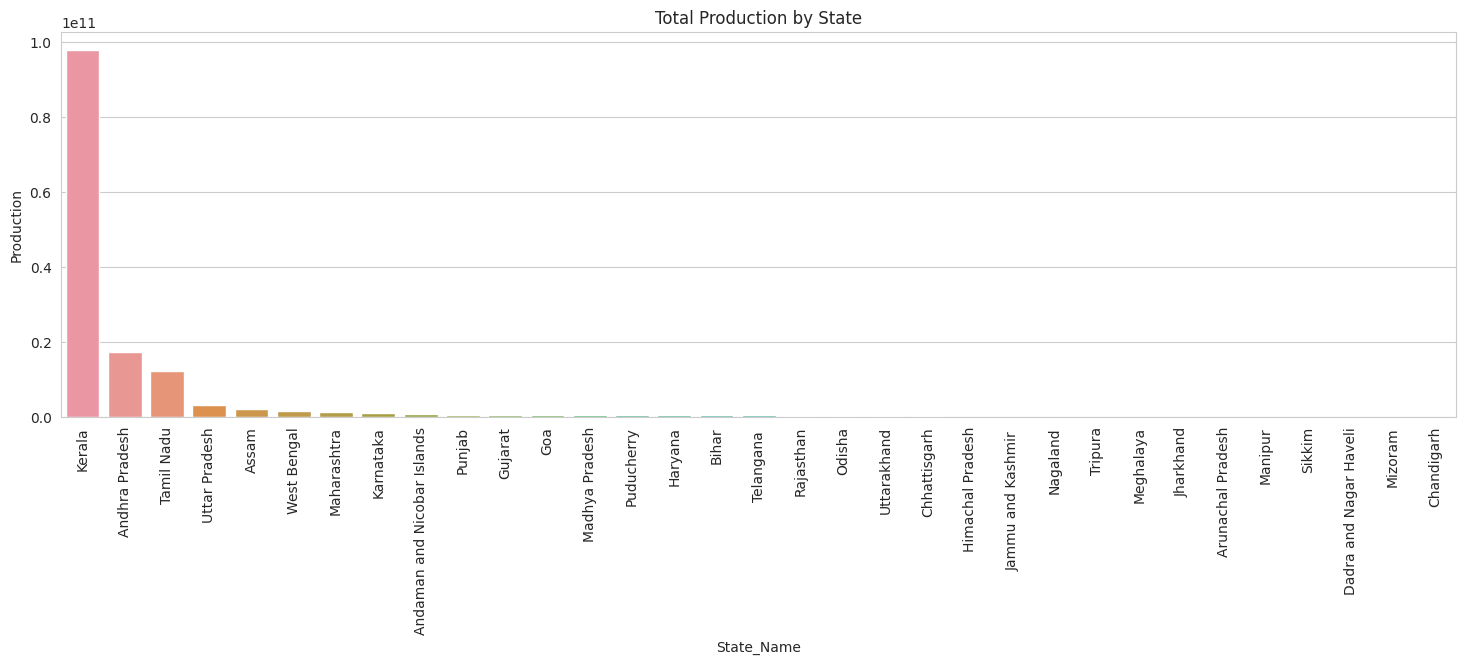

In [ ]:
# States by their productions
_ = plt.figure(figsize=(18,5))
plt.title("Total Production by State")
d = df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='State_Name', y='Production', data=d)
_ = plt.xticks(rotation=90)

Kerala has the highest total production followed by Andhra Pradesh which differs by huge margin.

In [ ]:
# Unique Seasons
df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [ ]:
# Removing Extra Spaces in Season names
df['Season'] = df['Season'].str.strip()

In [ ]:
# Processed Season names
df['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

Text(0.5, 1.0, 'Crop Production by Season')

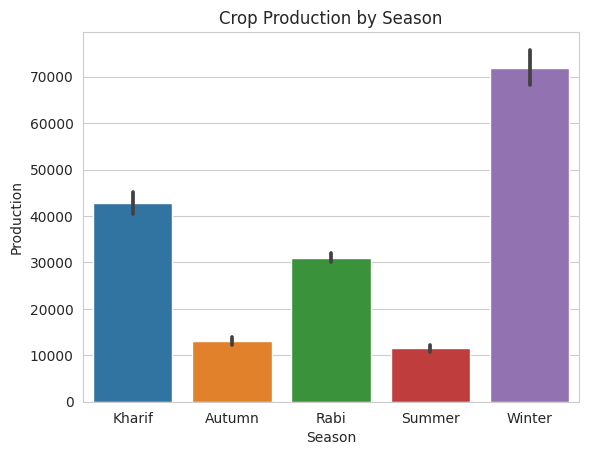

In [ ]:
# Exclude 'Whole Year' as it is not a season
d = df[df['Season'] != 'Whole Year']

# Group the data by season and sum the production values
season_production = d.groupby(['Season'])['Production'].sum().reset_index()

# Plot the production by season
sns.barplot(x='Season', y='Production', data=d)
plt.title('Crop Production by Season')

Winter season has the highest total production.

In [ ]:
# Unique Crops
df['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [ ]:
# Removing Extra Spaces in Crop names
df['Crop'] = df['Crop'].str.strip()

Text(0.5, 1.0, 'Top 10 crops by production')

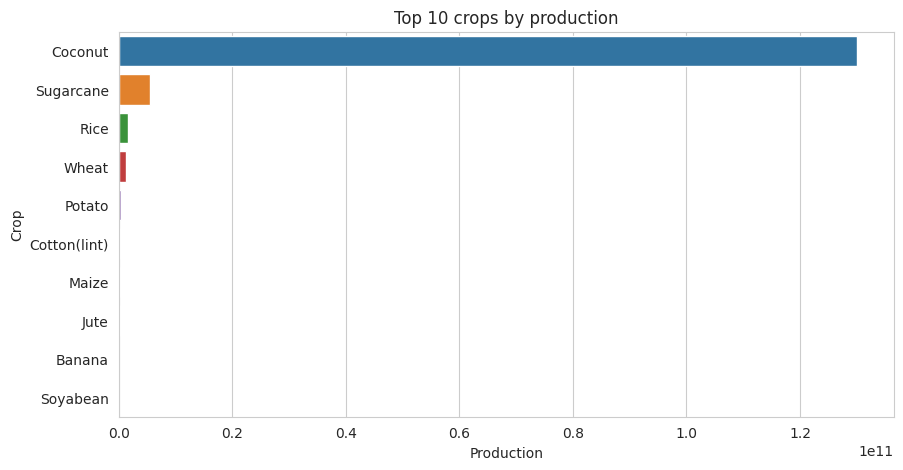

In [ ]:
# Top 10 crops by production
d = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10).reset_index()
_ = plt.figure(figsize=(10,5))
sns.barplot(y='Crop', x='Production', data=d)
plt.title("Top 10 crops by production")

Coconut tops the list of highest prodution by quantity. Sugercane is second which differs with a huge margin from first.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  object 
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), object(5)
memory usage: 14.8+ MB


Text(0.5, 1.0, 'Crop Production per unit Area')

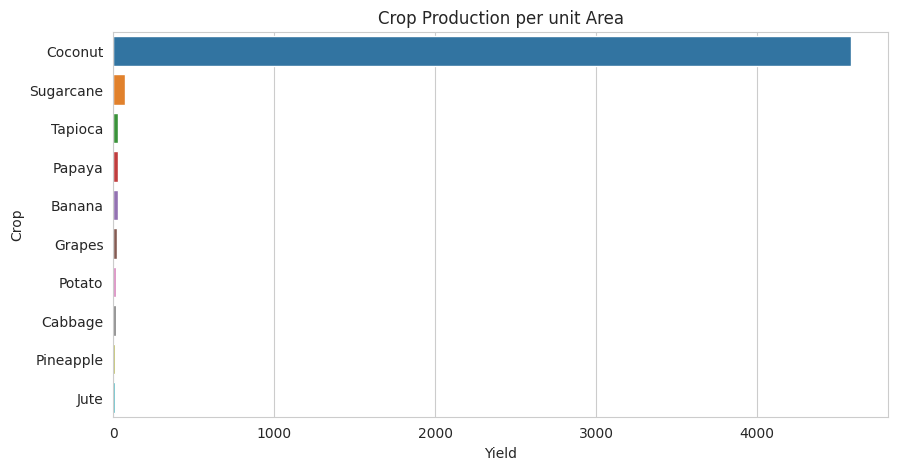

In [ ]:
# Crops with highest production per unit area
crop_data = df.groupby('Crop')[['Production', 'Area']].sum().reset_index()
# calculate crop production per unit area
crop_data['Yield'] = crop_data['Production'] / crop_data['Area']

# top 10 crops with highest production per area
crop_data = crop_data.sort_values('Yield', ascending=False).head(10)

_ = plt.figure(figsize=(10,5))
sns.barplot(y='Crop', x='Yield', data=crop_data)
plt.title('Crop Production per unit Area')

Again coconut tops the list in terms of yield (production/area) which beats sugercane (second) by huge margin.

Text(0.5, 1.0, 'Top 10 States by Crop Yield')

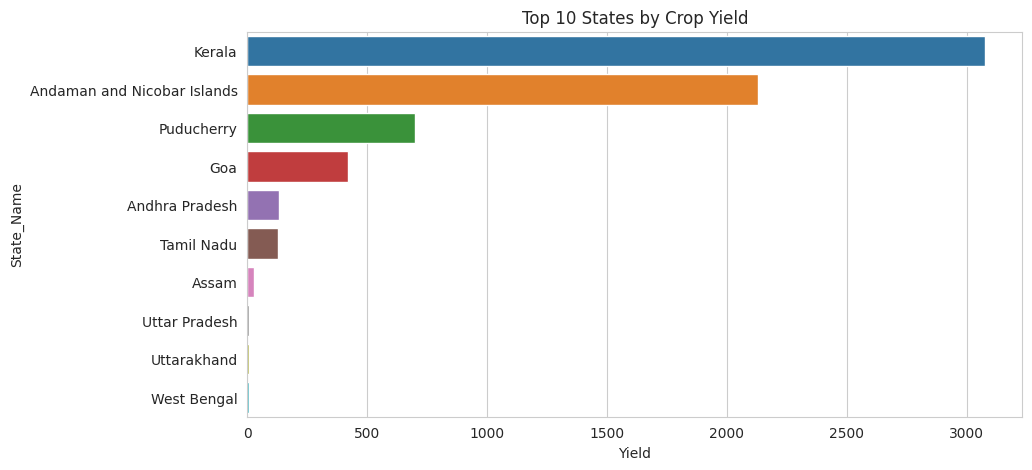

In [ ]:
# Top 10 states with highest production per unit area
state_prod_data = df.groupby(['State_Name'])[['Production', 'Area']].sum().reset_index()
# calculate crop production per unit area
state_prod_data['Yield'] = state_prod_data['Production'] / state_prod_data['Area']

# top 10 crops with highest production per area
yield_data = state_prod_data.sort_values('Yield', ascending=False).head(10)

_ = plt.figure(figsize=(10,5))
sns.barplot(y='State_Name', x='Yield', data=yield_data)
plt.title('Crop Production per unit Area')
plt.title('Top 10 States by Crop Yield')

No doubt, states that have coastline with sea tops the list of crop yield as coconut has highest yield.

<Axes: xlabel='Crop_Year', ylabel='Yield'>

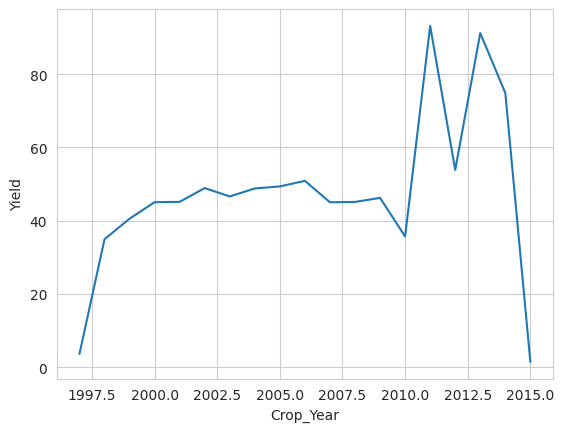

In [ ]:
d = df.groupby('Crop_Year')[['Production', "Area"]].sum().reset_index()
d['Yield'] = d['Production'] / d['Area']
sns.lineplot(x='Crop_Year', y='Yield', data=d)

Crop yield trend is similar to total production trend over the years.

In [ ]:
# Top Crops produced for each state
state_crop_prod = df.groupby(['State_Name', 'Crop'])['Production'].sum().reset_index()
state_crop_prod = state_crop_prod.loc[state_crop_prod.groupby('State_Name')['Production'].idxmax(), ['State_Name', 'Crop']]
state_crop_prod = state_crop_prod.sort_values(by='Crop')
state_crop_prod

,State_Name,Crop
5,Andaman and Nicobar Islands,Coconut
1042,Telangana,Coconut
968,Tamil Nadu,Coconut
831,Puducherry,Coconut
505,Kerala,Coconut
266,Goa,Coconut
1205,West Bengal,Coconut
32,Andhra Pradesh,Coconut
110,Assam,Coconut
361,Himachal Pradesh,Maize


Top produced crop for most costal states are coconuts, for most northeast states it is rice, for northwestern states (punjab, haryana, rajasthan etc) is wheat and for alot of other states it is sugarcane.

In [ ]:
# Creating top 6 crops for visualization on different parameters
top_crops = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(6).index.tolist()

In [ ]:
# Function to plot pie chart for proportion of production of crops by states
def crop_production_pie_chart(crop, df, n=9):
  crop_df = df[df['Crop']==crop]
  state_production = crop_df.groupby('State_Name')['Production'].sum().sort_values(ascending=False)
  topn_states = state_production[:n]
  other_states = pd.Series(state_production[n:].sum(), index=['Others'])
  new_df = pd.concat([topn_states, other_states])
  plt.pie(new_df, labels=new_df.index, autopct='%1.1f%%')
  plt.title(f'{crop} Production by States')

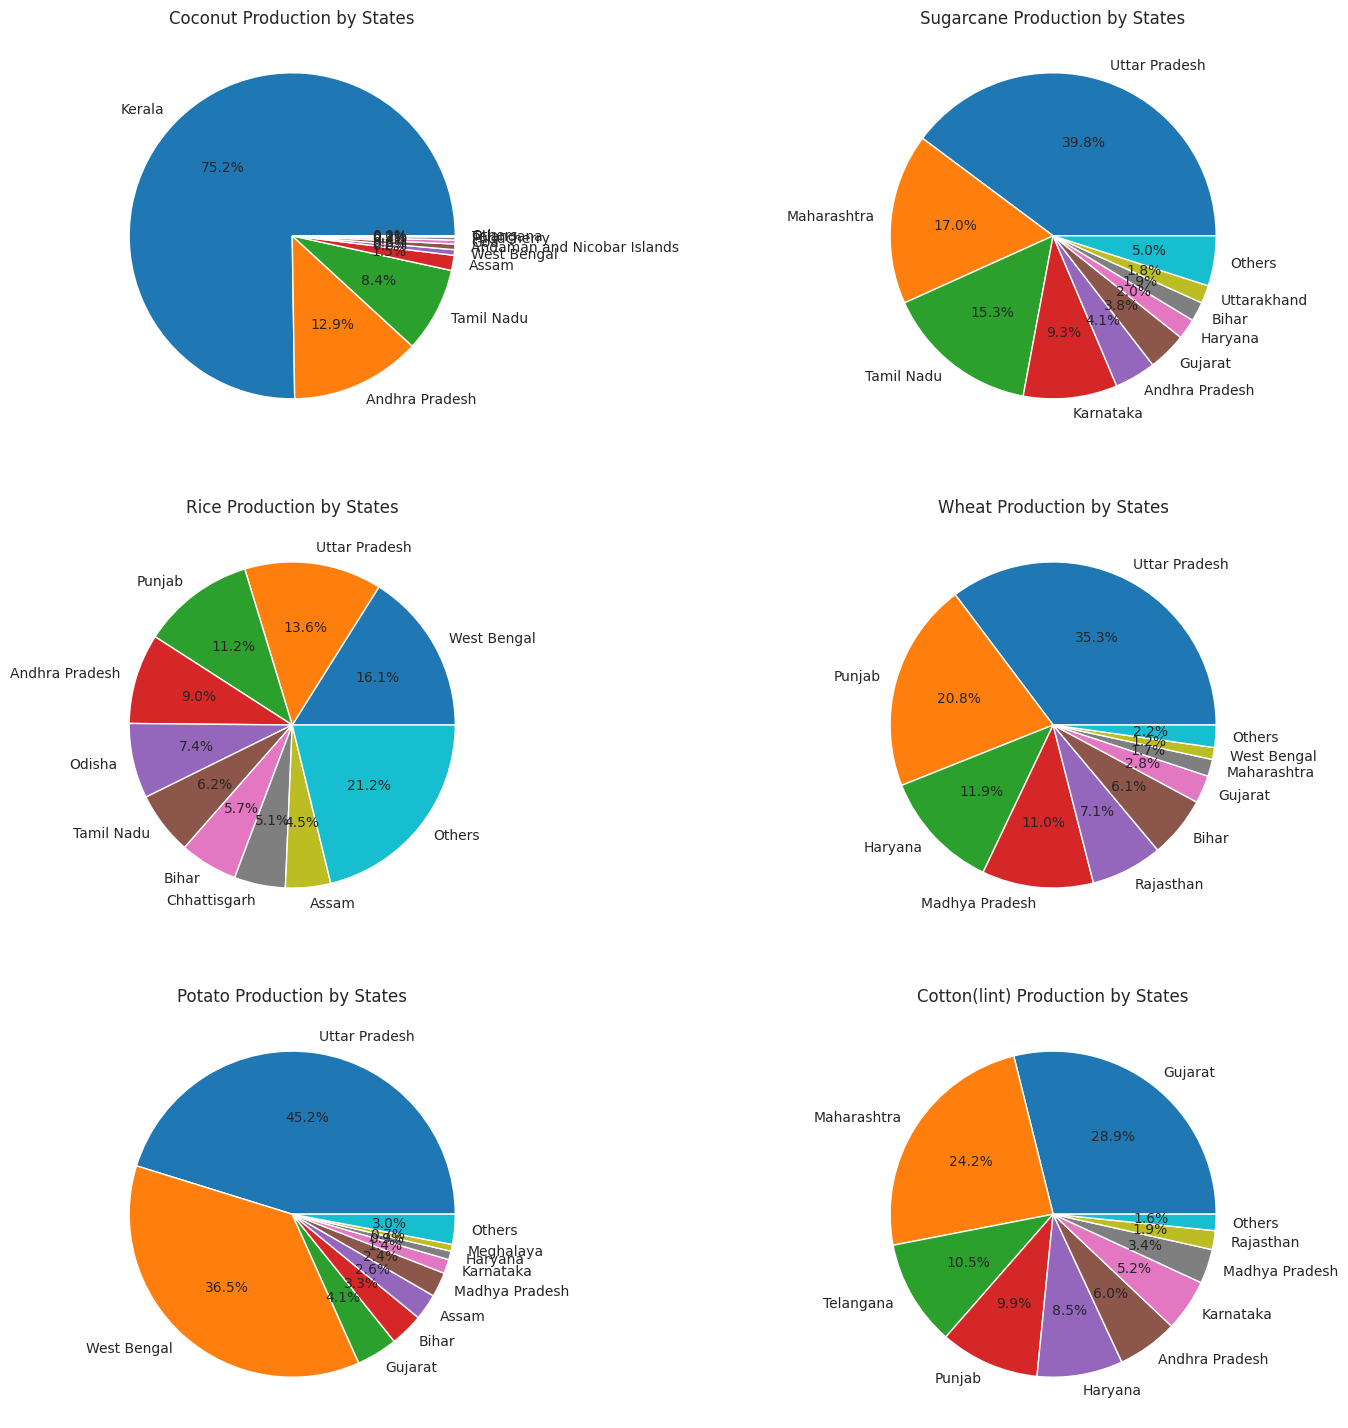

In [ ]:
# Top crop producing states by volume
plt.figure(figsize=(18, 18))
for i, crop in enumerate(top_crops):
  plt.subplot(3, 2, i+1)
  crop_production_pie_chart(crop, df)

For producing coconuts, kerala dominates over all other states.

Uttar Pradesh produces largest amount of sugercane followed by maharastra.

Uttar Pradesh and West Bengal are two dominant players for producing potatos.

Gujarat and Maharastra combined produces almost half of total production of cotton.

Similarly, Uttar Pradesh and Punjab combined produces almost half of total production of wheat.

In [ ]:
# Function to plot line chart to show trend of productions of individual crops over the years
def crop_production_trend(crop, df):
  df_crop = df[df['Crop'] == crop]
  df_grouped = df_crop.groupby('Crop_Year')['Production'].sum().reset_index()
  sns.lineplot(x=df_grouped['Crop_Year'], y=df_grouped['Production'])
  plt.xlabel('Year')
  plt.ylabel('Production')
  plt.title(f'Production Trend of {crop}')

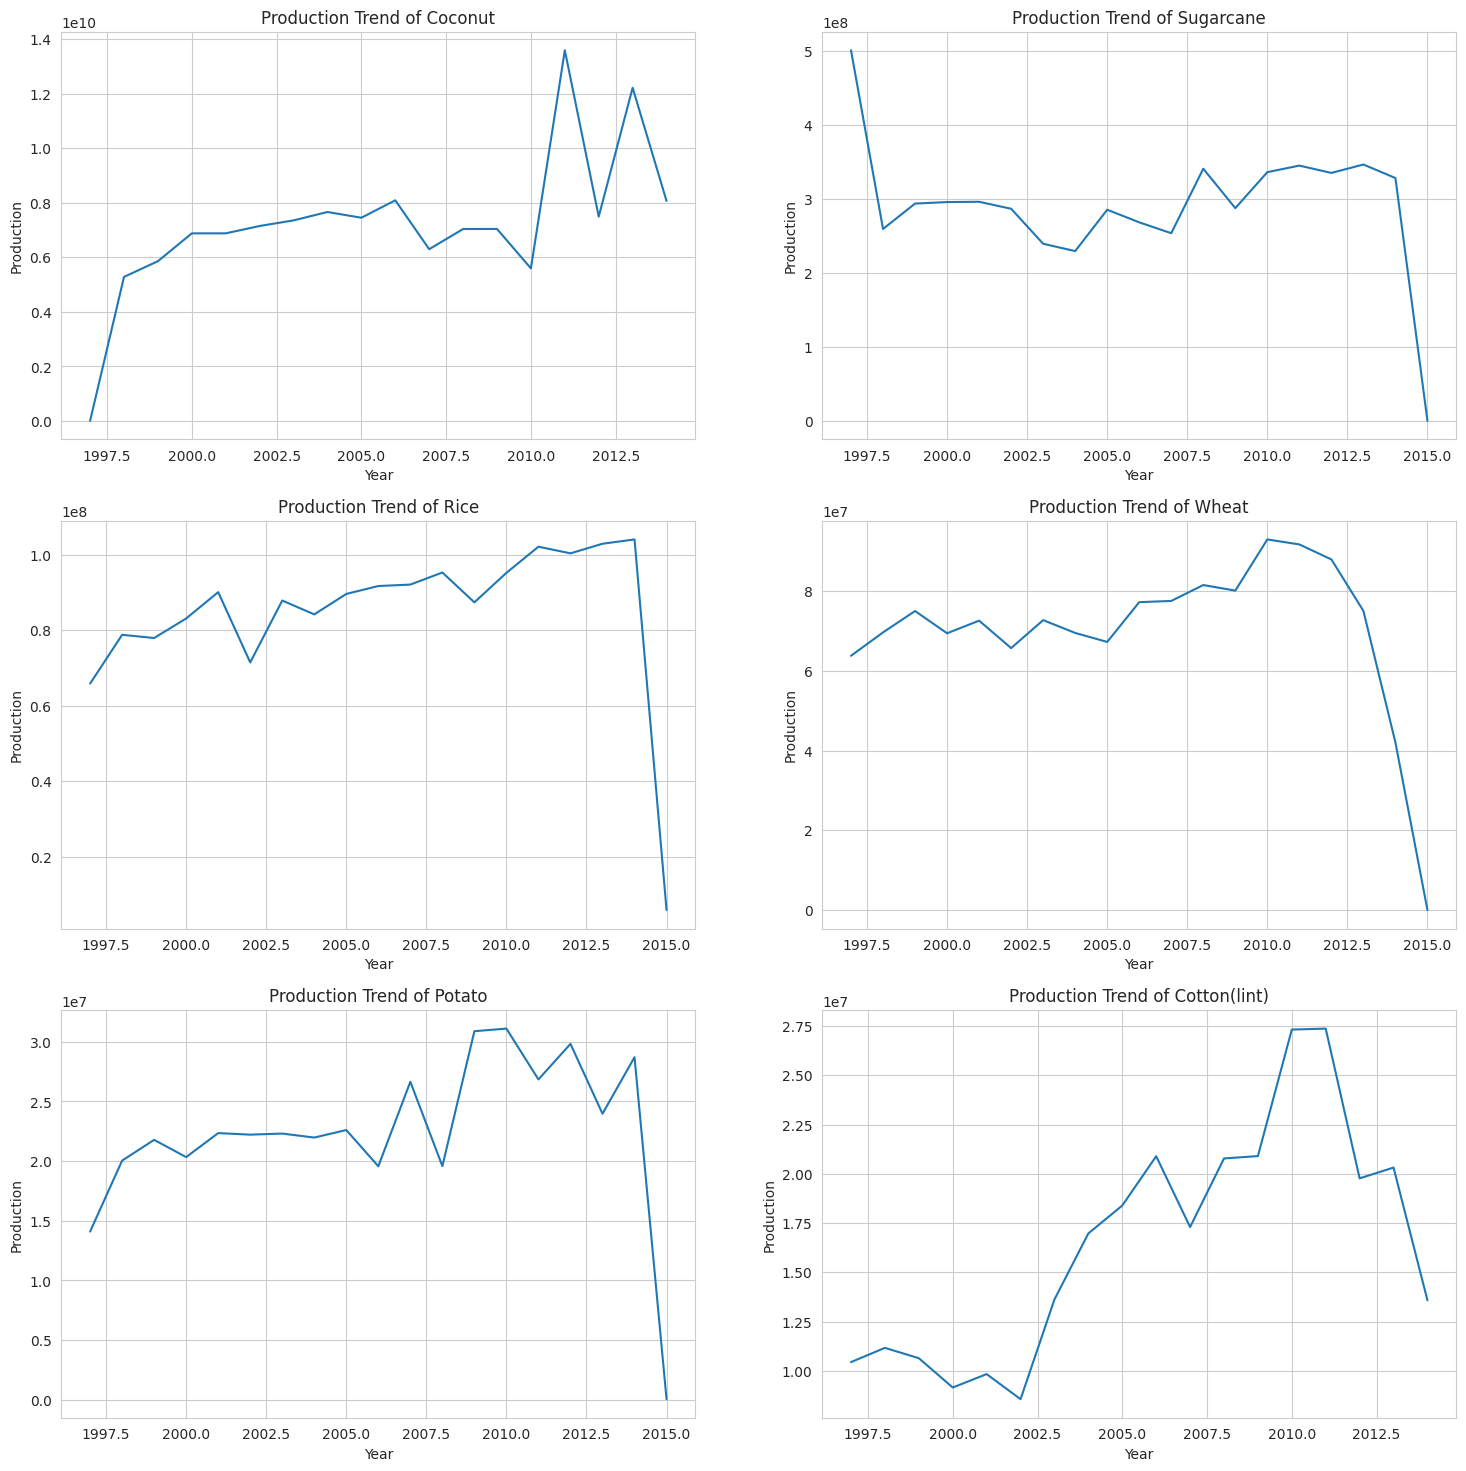

In [ ]:
# Crop production trend over the years
plt.figure(figsize=(18, 18))
for i, crop in enumerate(top_crops):
  plt.subplot(3, 2, i+1)
  crop_production_trend(crop, df)

Cotton production has almost skyrocketed after 2000s.

Almost all the crops have slightly positive trend of increase in production over years.

<Axes: xlabel='Production', ylabel='District_Name'>

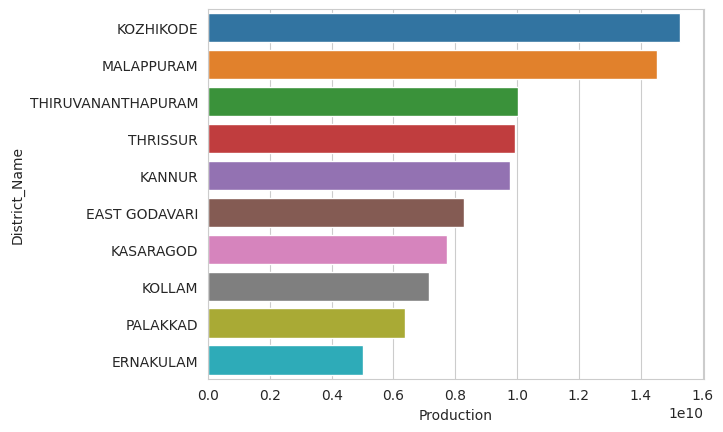

In [ ]:
# Top 10 districts by production
df_district = df.groupby('District_Name')['Production'].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(x='Production', y='District_Name', data=df_district)

Most top districts are mainly in kerala, because they produces coconuts and we saw that coconut production top the list both in terms of total production and production per unit area.

In [ ]:
# Function to show top n districts for production of crops
def crop_production_by_district(crop, df, n=10):
  df_crop = df[df['Crop'] == crop]
  df_grouped = df_crop.groupby('District_Name')['Production'].sum().sort_values(ascending=False).reset_index().head(n)
  sns.barplot(y=df_grouped['District_Name'], x=df_grouped['Production'])
  plt.ylabel('District')
  plt.xlabel('Production')
  plt.title(f'Top district producing {crop}')

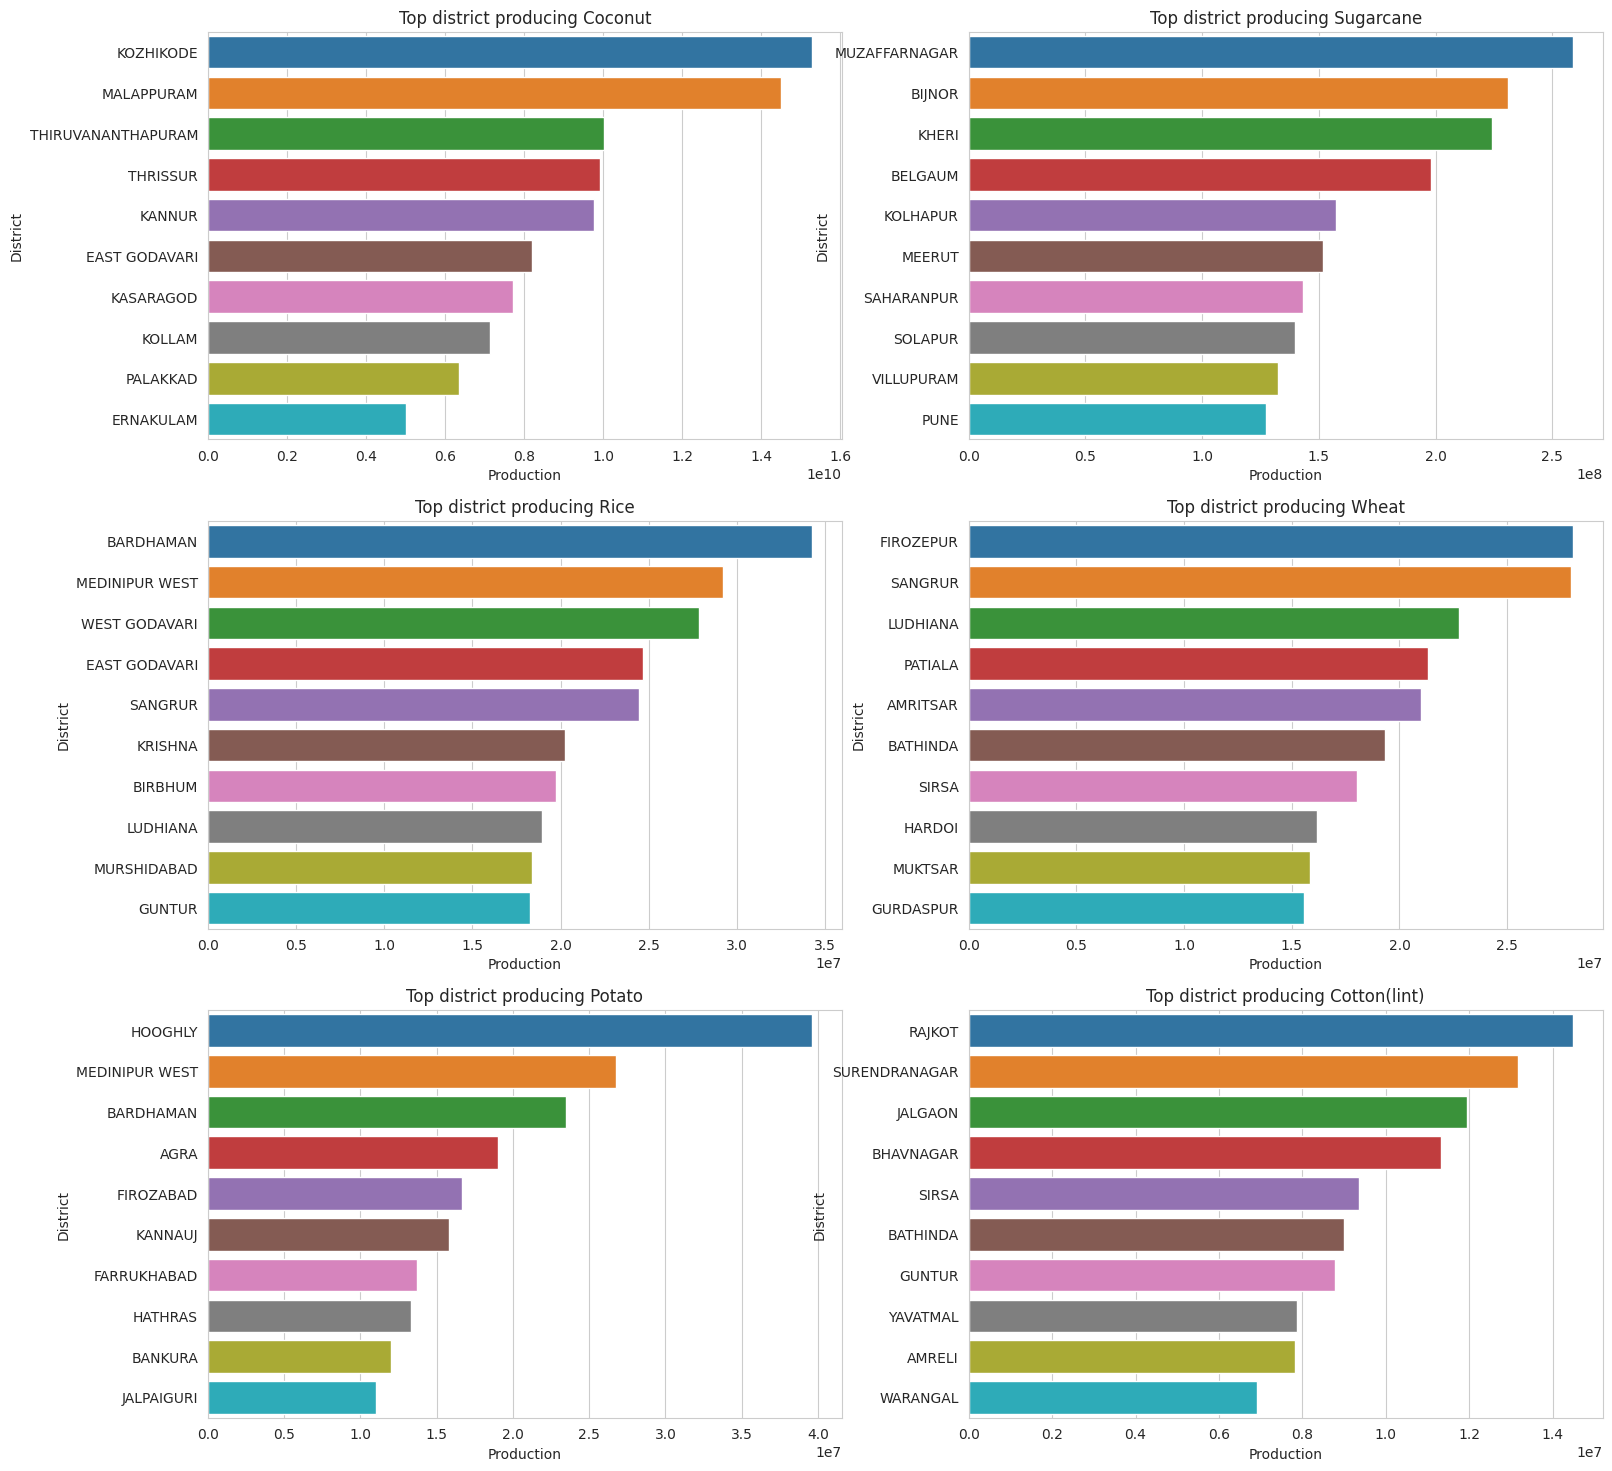

In [ ]:
# Top crop producing districts by volume
plt.figure(figsize=(18, 18))
for i, crop in enumerate(top_crops):
  plt.subplot(3, 2, i+1)
  crop_production_by_district(crop, df)